In [ ]:
import warnings
warnings.filterwarnings("ignore")

####**Importing Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam,Nadam,RMSprop
from keras.losses import MeanSquaredError,MeanAbsolutePercentageError
from keras.activations import linear,relu,elu,tanh
from keras.layers import Dense, Dropout
from keras.models import Sequential

####**Dataset Overview** :
#####Dataset Name : Flight Fare Prediction
#####Dataset Source : [Kaggle](https://www.kaggle.com/bhaveshsonagra/flight-fare-prediction) 

####**Problem statement**:
##### To predict the Fare of the Flight given the inputs and as our Target variable is a Numerical variable, this is a Regression Problem

####**Ways to solve**:
##### There are many ways to solve this Problem,
##### 1. We can do Regression, using the algorithms we have.
##### 2. Making it as simple time-series problem by splitting using time based splitting, as we have date and time ,but we have only the data for 1 year
##### 3. Using Deep learning if our Supervised algorithms are unable to learn and predict from the data 

#### **Plan of attack**:
#####**1**. Reading the Dataset
#####**2**. **EDA**
#####**2.1**. Checking the shapes
#####**2.2**. Checking the Rows and Columns
#####**2.3**. Univariate analysis of Columns
#####**2.4**. Bi-variate analysis of Columns
#####**3**. **Data Preprocessing**
#####**3.1**. Removal of Duplicates
#####**3.2**. Removal/Imputing of Missing values
#####**3.3**. Removal of Outliers for Numerical Variables
#####**3.4**. Making the dataset ready
#####**4**. **Modelling**
#####**4.1**. Selecting the Metrics
#####**4.2**. Noting the models that are useful for this problem
#####**4.3**. Applying models on Dataset
#####**4.4**. Checking for overfitting or underfitting.
#####**4.5**. Selecting the model which gives best metric.
#####**4.6**. Hyperparameter tuning on the best model.
#####**5**. **Final**
#####**5.1**. Reporting the scores at last of all the models.
#####**5.2**. Conclusions 

#### **1.Reading the Dataset**

In [ ]:
data=pd.read_excel("Data_Train.xlsx")

####**2.1 Checking the Shapes**

In [ ]:
print("The dataset shape is "+ str(data.shape))
print(" ")
print("The Number of rows are "+ str(data.shape[0]))
print(" ")
print("The Number of columns are "+ str(data.shape[1]))

The dataset shape is (10683, 11)
 
The Number of rows are 10683
 
The Number of columns are 11


#### **2.2 Checking the Rows and Columns**

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(data.columns)

#We are not getting much information here, let's try another way

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [ ]:
print(data.info())

# Now, we can see that all my 10 variables are categorical Variables except Price which is my dependent Numericial variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


In [ ]:
data.head(1)

#Checking one of the rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


####**2.3 Univariate analysis of Columns**

In [ ]:
def Univariate_analysis(column,flag):
  ''' Function to do basic univariate analysis '''
  print("\033[1m"+"1.Unique Categories"+'\033[0m')
  print("Number of Unique Categories in this variable are "+str(len(data[column].unique())))
  print("")
  if flag==0:
    print("\033[1m"+"2.Categories Count"+'\033[0m')
    print(data[column].value_counts())
    print(" ")
  else:
    print("\033[1m"+"2.Categories Count(Top 10)"+'\033[0m')
    print(data[column].value_counts()[:10])
    print(" ")
  print("\033[1m"+"3.Missing Values"+'\033[0m')
  print("The Number of Missing values is "+str(data[column].isnull().sum()))
  print(" ")
  if flag==0:
    print("\033[1m"+"4.Plot showing the counts"+'\033[0m')
    plot=data[column].value_counts().plot(kind='bar')  

###### **Univariate Analysis on Airline Column**

1.Unique Categories
Number of Unique Categories in this variable are 12

2.Categories Count
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
 
3.Missing Values
The Number of Missing values is 0
 
4.Plot showing the counts


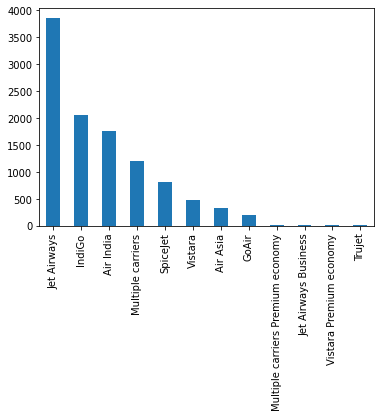

In [ ]:
Univariate_analysis('Airline',0)

# As, Jet airways had paused their operations, we can remove them but we won't have much data as Jet Airways solely include 3855 datapoints.

###### **Univariate Analysis on Source Column**

1.Unique Categories
Number of Unique Categories in this variable are 5

2.Categories Count
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
 
3.Missing Values
The Number of Missing values is 0
 
4.Plot showing the counts


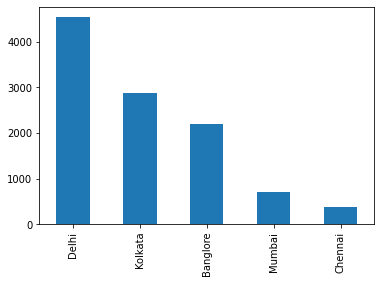

In [ ]:
Univariate_analysis('Source',0)

###### **Univariate Analysis on Destination Column**

1.Unique Categories
Number of Unique Categories in this variable are 6

2.Categories Count
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
 
3.Missing Values
The Number of Missing values is 0
 
4.Plot showing the counts


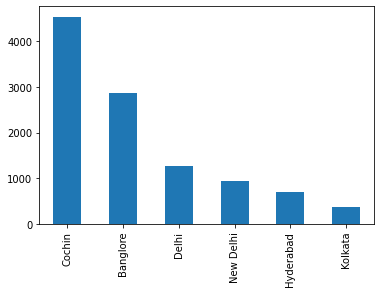

In [ ]:
Univariate_analysis('Destination',0)

###### **Univariate Analysis on Route Column**

In [ ]:
Univariate_analysis('Route',1)

1.Unique Categories
Number of Unique Categories in this variable are 129

2.Categories Count(Top 10)
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
Name: Route, dtype: int64
 
3.Missing Values
The Number of Missing values is 1
 


###### **Univariate Analysis on Departure_Time Column**

In [ ]:
Univariate_analysis('Dep_Time',1)

1.Unique Categories
Number of Unique Categories in this variable are 222

2.Categories Count(Top 10)
18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
20:00    185
09:00    184
09:35    183
21:10    180
07:00    167
Name: Dep_Time, dtype: int64
 
3.Missing Values
The Number of Missing values is 0
 


###### **Univariate Analysis on Arrival Time Column**

In [ ]:
#Column Arrival_Time

Univariate_analysis('Arrival_Time',1)


print("\033[1m"+'4.Some Datapoints'+'\033[0m')

print(data['Arrival_Time'].head())

#Here if we can see the data, we have date and months on them, so we should remove them in preprocessing stage

1.Unique Categories
Number of Unique Categories in this variable are 1343

2.Categories Count(Top 10)
19:00    423
21:00    360
19:15    333
16:10    154
12:35    122
20:45    112
18:50    111
22:30    111
22:50    104
11:20     95
Name: Arrival_Time, dtype: int64
 
3.Missing Values
The Number of Missing values is 0
 
4.Some Datapoints
0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
Name: Arrival_Time, dtype: object


###### **Univariate Analysis on Duration Column**

In [ ]:
#Column Duration

Univariate_analysis('Duration',1)


#We should split the hours and minutes into two seperate columns in preprocessing stage

1.Unique Categories
Number of Unique Categories in this variable are 368

2.Categories Count(Top 10)
2h 50m    550
1h 30m    386
2h 45m    337
2h 55m    337
2h 35m    329
3h        261
2h 20m    238
2h 30m    220
2h 40m    158
2h 15m    135
Name: Duration, dtype: int64
 
3.Missing Values
The Number of Missing values is 0
 


###### **Univariate Analysis on Total Stops Column**

1.Unique Categories
Number of Unique Categories in this variable are 6

2.Categories Count
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64
 
3.Missing Values
The Number of Missing values is 1
 
4.Plot showing the counts


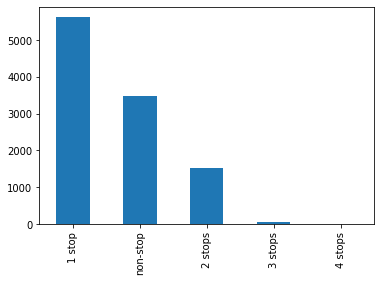

In [ ]:
Univariate_analysis('Total_Stops',0)

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


###### **Univariate Analysis on Additional_Info Column**

1.Unique Categories
Number of Unique Categories in this variable are 10

2.Categories Count
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64
 
3.Missing Values
The Number of Missing values is 0
 
4.Plot showing the counts


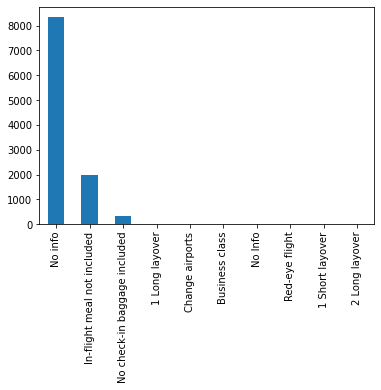

In [ ]:
Univariate_analysis('Additional_Info',0)

# 1. We can see that amoung the 10,000+ datapoints, 8348 datapoints have No_info
# 2. It will be nearly 80% data.So, we will be dropping it in preprocessing stage

###### **Univariate Analysis on Price Column**

In [ ]:
Univariate_analysis('Price',1)


print("\033[1m"+'4.Low-level Statistics'+'\033[0m')

print(data['Price'].describe(percentiles=[0.10,0.25,0.50,0.75,0.80,0.95,0.99,0.995,0.999,0.9995,0.9999]))
print(" ")
print("\033[1m"+'Some Observations'+'\033[0m')
print(" ")
print("1. The Minimum Fare is 1759 INR") 
print(" ")
print("2. We can see that the highest Fare is 79k INR.")
print(" ")
print("3. The Average Fare is 9087 INR.")
print(" ")
print("4. We can see 99.5% of the flights have a price less than 26890 INR")
print(" ")
print("5. We can see 99.9% of the flights have a price less than 36235 INR")

1.Unique Categories
Number of Unique Categories in this variable are 1870

2.Categories Count(Top 10)
10262    258
10844    212
7229     162
4804     160
4823     131
14714    109
3943     104
15129     93
3841      91
12898     86
Name: Price, dtype: int64
 
3.Missing Values
The Number of Missing values is 0
 
4.Low-level Statistics
count     10683.000000
mean       9087.064121
std        4611.359167
min        1759.000000
10%        3943.000000
25%        5277.000000
50%        8372.000000
75%       12373.000000
80%       13042.000000
95%       15764.000000
99%       22270.000000
99.5%     26890.000000
99.9%     36235.000000
99.95%    53959.519000
99.99%    62071.132400
max       79512.000000
Name: Price, dtype: float64
 
Some Observations
 
1. The Minimum Fare is 1759 INR
 
2. We can see that the highest Fare is 79k INR.
 
3. The Average Fare is 9087 INR.
 
4. We can see 99.5% of the flights have a price less than 26890 INR
 
5. We can see 99.9% of the flights have a price less than

#### **2.4 Bi-Variate Analysis of Columns**

In [ ]:
def bi_variate_analysis(column,flag1,flag2):
  if flag1==0:
    data.groupby(column)['Price'].median().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel("Average Price")
    plt.title(column+" " +"v/s"+" Price")
  if flag2==0:
    
    print("\033[1m"+'Average_Price'+'\033[0m')
    print(" ")
    print(data.groupby(column)['Price'].median()[:10])

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


###### **Bivariate Analysis of Airline and Price Column**

Average_Price
 
Airline
Air Asia                              5162
Air India                             9443
GoAir                                 5135
IndiGo                                5000
Jet Airways                          11467
Jet Airways Business                 54747
Multiple carriers                    10197
Multiple carriers Premium economy    11269
SpiceJet                              3873
Trujet                                4140
Name: Price, dtype: int64
 
Some Observations:
 
1. Jet Airways,Jet Airways Business has the Prices much more when compared to others
 
2. Multiple carriers,Multiple carriers Premium economy also has prices high when compared to other Flights
 
3. Air Asia, GoAir, SpiceJet, Trujet, has the average price range less than 5000 
 


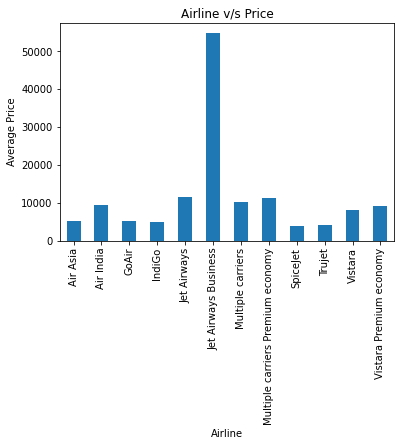

In [ ]:
bi_variate_analysis('Airline',0,0)

print(" ")
print("\033[1m"+'Some Observations:'+'\033[0m')
print(" ")
print("1. Jet Airways,Jet Airways Business has the Prices much more when compared to others")
print(" ")
print("2. Multiple carriers,Multiple carriers Premium economy also has prices high when compared to other Flights")
print(" ")
print("3. Air Asia, GoAir, SpiceJet, Trujet, has the average price range less than 5000 ")
print(" ")

###### **Bivariate Analysis of Date_of_Journey and Price Column**

In [ ]:
bi_variate_analysis('Date_of_Journey',1,0)

print(" ")
print("\033[1m"+'Some Observations:'+'\033[0m')
print(" ")
print("1. We have the data of only 10,000+ Flight Fares of the flights which travelled in 2019 in the months of 1,3,4,5,6,9,12")
print(" ")
print("2. Our Goal is to use this data and Predict the Fares")
print(" ")
print("3. We will also create the weekends column while data preprocessing in next stage")

Average_Price
 
Date_of_Journey
01/03/2019    22270.0
03/03/2019     8553.0
06/03/2019    16736.0
09/03/2019     7648.0
1/03/2019      8580.0
1/04/2019      7064.0
1/05/2019      8586.0
1/06/2019      9133.5
12/03/2019    12014.0
12/04/2019     4990.0
Name: Price, dtype: float64
 
Some Observations:
 
1. We have the data of only 10,000+ Flight Fares of the flights which travelled in 2019 in the months of 1,3,4,5,6,9,12
 
2. Our Goal is to use this data and Predict the Fares
 
3. We will also create the weekends column while data preprocessing in next stage


###### **Bivariate Analysis of Source and Price Column**

Average_Price
 
Source
Banglore     6121
Chennai      3850
Delhi       10262
Kolkata      9345
Mumbai       3342
Name: Price, dtype: int64
 
Some Observations:
 
1. Chennai and Mumbai has the Fair less than 4000 INR.
 
2. It is expensive to start a journey from Delhi, Kolkata as the average price is 10,262 INR, 9345 INR.
 
3. Banglore is in the midst of prices. It is having the average Fair value compared to High and low Fares.
 


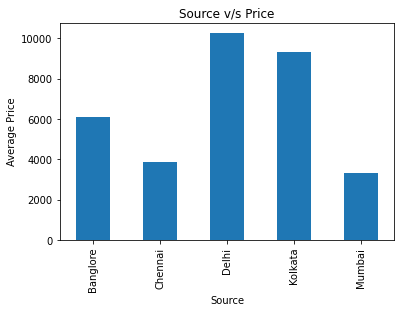

In [ ]:
bi_variate_analysis('Source',0,0)

print(" ")
print("\033[1m"+'Some Observations:'+'\033[0m')
print(" ")
print("1. Chennai and Mumbai has the Fair less than 4000 INR.")
print(" ")
print("2. It is expensive to start a journey from Delhi, Kolkata as the average price is 10,262 INR, 9345 INR.")
print(" ")
print("3. Banglore is in the midst of prices. It is having the average Fair value compared to High and low Fares.")
print(" ")

###### **Bivariate Analysis of Source,Destination and Price Column**

Sorce, Destination and Average Price:
 
Source    Destination
Banglore  Delhi           4823.0
          New Delhi      10898.5
Chennai   Kolkata         3850.0
Delhi     Cochin         10262.0
Kolkata   Banglore        9345.0
Mumbai    Hyderabad       3342.0
Name: Price, dtype: float64
 
Some Observations:
 
1. Here In X-axis we have both Source and Destination as Combined and the average price is shown
 
2. It is expensive to start a journey from Delhi to Cochin as the average price is 10,262 INR.
 
3. Banglore to Delhi is pretty midst interms of Fair, Not too high and not too low
 
4. Travelling from Mumbai to Hyderabad is very very reasonable as it having an average Fair of 3342 INR
 
5. Banglore is in the midst of prices. It is having the average Fair value compared to High and low Fares.
 


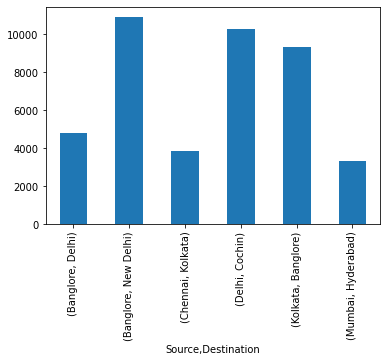

In [ ]:
# data=data.replace({"New Delhi":"Delhi"})  #We have same two cities as different destinations
d=data.groupby(['Source','Destination'])['Price'].median().plot(kind='bar')
print("\033[1m"+'Sorce, Destination and Average Price:'+'\033[0m')
print(" ")
print(data.groupby(['Source','Destination'])['Price'].median())
print(" ")
print("\033[1m"+'Some Observations:'+'\033[0m')
print(" ")
print("1. Here In X-axis we have both Source and Destination as Combined and the average price is shown")
print(" ")
print("2. It is expensive to start a journey from Delhi to Cochin as the average price is 10,262 INR.")
print(" ")
print("3. Banglore to Delhi is pretty midst interms of Fair, Not too high and not too low")
print(" ")
print("4. Travelling from Mumbai to Hyderabad is very very reasonable as it having an average Fair of 3342 INR")
print(" ")
print("5. Banglore is in the midst of prices. It is having the average Fair value compared to High and low Fares.")
print(" ")

###### **Bivariate Analysis of  Departure time and Price Column**

Departure Time(First 10) and Average Price:
 
Dep_Time
00:20    16644.5
00:25     3943.0
00:30     4284.0
00:40     4860.5
01:30     4077.0
01:35     9977.0
01:40     2754.0
02:00     6147.0
02:05    10394.0
02:15    12719.0
Name: Price, dtype: float64
 
Some Observations:
 
1. Here, we can't understand it clearly, as we are having different times, so creating a new variable
 


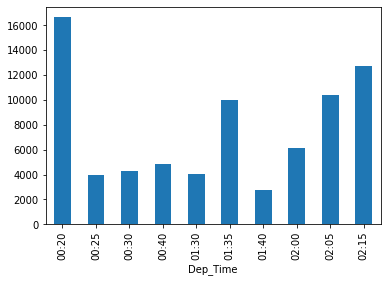

In [ ]:

d=data.groupby(['Dep_Time'])['Price'].median()[:10].plot(kind='bar')

print("\033[1m"+'Departure Time(First 10) and Average Price:'+'\033[0m')
print(" ")
print(data.groupby(['Dep_Time'])['Price'].median()[:10])
print(" ")
print("\033[1m"+'Some Observations:'+'\033[0m')
print(" ")
print("1. Here, we can't understand it clearly, as we are having different times, so creating a new variable")
print(" ")

###### **Creating a Day_Time variable for deep analysis**

Sorce, Destination(First 10) and Average Price:
 
day_time
Afternoon    8656
Evening      8586
Morning      8372
Night        5894
Name: Price, dtype: int64
 
Some Observations:
 
1. Now we can see the fares w.r.t the Times of Day, But it is not very clear, Let's take Banglore as an example and see this
 


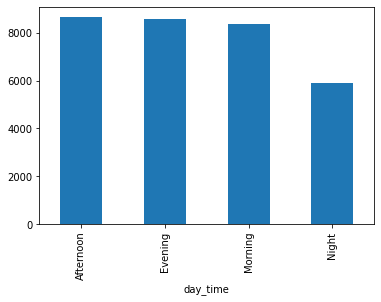

In [ ]:
day_time=[]
for time in pd.to_datetime(data['Dep_Time']):
  i=time.hour
  if i >= 5 and i< 12:
    day_time.append("Morning")
  elif i >= 12 and i < 17:
    day_time.append("Afternoon")
  elif i>=17 and i < 22 :
    day_time.append("Evening")
  else:
    day_time.append("Night") 

new_data=pd.DataFrame({'day_time':np.array(day_time),'Price':np.array(data['Price']),'Source':np.array(data['Source']),'Destination':np.array(data['Destination'])})

d=new_data.groupby(['day_time'])['Price'].median().plot(kind='bar')

print("\033[1m"+'Sorce, Destination(First 10) and Average Price:'+'\033[0m')
print(" ")
print(new_data.groupby(['day_time'])['Price'].median())
print(" ")
print("\033[1m"+'Some Observations:'+'\033[0m')
print(" ")
print("1. Now we can see the fares w.r.t the Times of Day, But it is not very clear, Let's take Banglore as an example and see this")
print(" ")

###### **Bivariate Analysis of Day_Time and Price Column on Banglore Trips**

Sorce, Destination(First 10) and Average Price:
 
day_time
Afternoon    7229
Evening      5613
Morning      6781
Night        4483
Name: Price, dtype: int64
 
Some Observations when Source city is Banglore:
 
1. It is better to Travel from Banglore to Delhi at Night Time
 
2. If we travel from Banglore to Delhi in Afternoon and Morning, we should high Fare
 


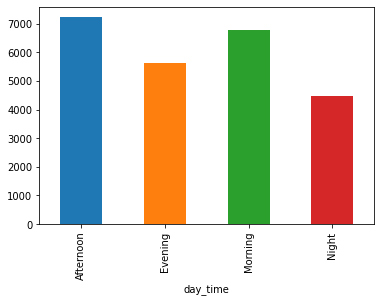

In [ ]:
d=new_data[data['Source']=="Banglore"].groupby(['day_time'])['Price'].median().plot(kind='bar',color=['C0', 'C1', 'C2', 'C3', 'C4'])

print("\033[1m"+'Sorce, Destination(First 10) and Average Price:'+'\033[0m')
print(" ")
print(new_data[data['Source']=="Banglore"].groupby(['day_time'])['Price'].median())
print(" ")
print("\033[1m"+'Some Observations when Source city is Banglore:'+'\033[0m')
print(" ")
print("1. It is better to Travel from Banglore to Delhi at Night Time")
print(" ")
print("2. If we travel from Banglore to Delhi in Afternoon and Morning, we should high Fare")
print(" ")

###### **Bivariate Analysis of Total_Stops and Price Column**

Average_Price
 
Total_Stops
1 stop      10262
2 stops     12760
3 stops     12954
4 stops     17686
non-stop     4667
Name: Price, dtype: int64
 
Some Observations:
 
1. To save fare it is better to go in Non-Stop Trip
 
2. By this, we came to know that The more the stops, the higher will be the fare price
 
3. Both 2-Stops, 3-Stops fares are aproximately same.
 


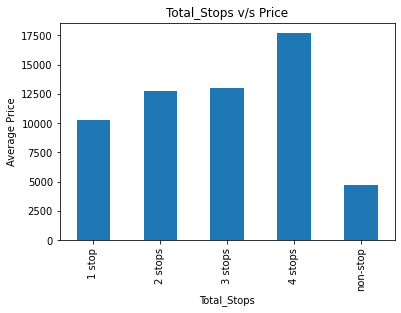

In [ ]:
bi_variate_analysis('Total_Stops',0,0)

print(" ")
print("\033[1m"+'Some Observations:'+'\033[0m')
print(" ")
print("1. To save fare it is better to go in Non-Stop Trip")
print(" ")
print("2. By this, we came to know that The more the stops, the higher will be the fare price")
print(" ")
print("3. Both 2-Stops, 3-Stops fares are aproximately same.")
print(" ")

#####**By Doing EDA we found these things to be done in Data Preprocessing step :**
######1. We have missing values in Route Column, Total Stops
######2. In Arrival Time column we have Month and date, they should be removed in Data Preprocessing.
######3. In Duration we have the values like 2h 30m, so we should convert them into 02:30 format in next stages
######4. Should create a new column time of the day based on the departure time.
######5. Convert all the categorical variables into One hot encoded vectors.
######6. Convert the columns like Date of journey into seperate columns of date, month, year, hours, minutes.
######7. Remove the Route Column, Additional Info columns.
######8. Convert Total_stops to one hot encoded vectors.
######9. Before performing, all the Data Preprocessing, split the data into train and test to avoid data leakage.**bold text**

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


#### **3. Data Preprocessing**

######**3.1 Checking and Removal of Duplicates**

In [ ]:
# count_data_duplicate=len(data[data.duplicated()])

# print("We have {} duplicates in data and we have to remove them".format(count_data_duplicate))

# data.drop_duplicates(inplace=True,ignore_index=True)

# print(" ")
# print("After removing duplicates")

# count_data_duplicate=len(data[data.duplicated()])

# print()
# print("We have {} duplicates in data".format(count_data_duplicate))

In [ ]:
#Found that we had only 1 Trujet flight Fare, so removing it

data=data[data['Airline']!='Trujet']
data=data[data['Airline']!='Vistara Premium economy']
data=data[data['Total_Stops']!='4 stops']
data=data[data['Airline']!='Jet Airways Business']

######**3.2 Checking and Removal of Missing Values**

In [ ]:
# We knew when we did EDA that we have missing values in Route variable and Total_Stops, but as we are dropping Route,
# We shall remove missing rows from that Total_Stops Column

print("\033[1m"+"Before Removal"+'\033[0m')
print(" ")
print(data.isnull().sum())


data.dropna(axis=0,inplace=True)

print(" ")
print("\033[1m"+"After Removal"+'\033[0m')
print(" ")
print(data.isnull().sum())

Before Removal
 
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
 
After Removal
 
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [ ]:
data.reset_index(inplace=True,drop=True)

In [ ]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Multiple carriers Premium economy'], dtype=object)

In [ ]:
#Splitting of data into train and test
from sklearn.model_selection import train_test_split
x=data[['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route','Dep_Time','Duration', 'Total_Stops','Additional_Info']]
y=data['Price']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.2,random_state=13)

In [ ]:
x.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info


##### **Steps to follow in this stage :**
#####**1.** We have to Convert the Date_of_Journey,Dep_time and arrival time Variable and convert date,moth,year,hours,minutes into different columns
#####**2.** We have to change the categorical data to one hot encoded vectors
#####**3.** We should Convert duration column as 2h 30m to different columns.
#####**4.** We should perform all these steps in all the datasets, train,cv,test datasets.

##### Preprocessing Date_of_Journey column

In [ ]:
day_variable_train=[i.day for i in pd.to_datetime(X_train['Date_of_Journey'])]
day_variable_cv=[i.day for i in pd.to_datetime(X_cv['Date_of_Journey'])]
day_variable_test=[i.day for i in pd.to_datetime(X_test['Date_of_Journey'])]

month_variable_train=[i.month for i in pd.to_datetime(X_train['Date_of_Journey'])]
month_variable_cv=[i.month for i in pd.to_datetime(X_cv['Date_of_Journey'])]
month_variable_test=[i.month for i in pd.to_datetime(X_test['Date_of_Journey'])]

#We will concat all the variables at last w.r.t each dataset

##### Preprocessing Dep_Time and Arrival_Time column

In [ ]:
#-----------------------------------------------------------------------------------
Dep_hour_train=[i.hour for i in pd.to_datetime(X_train['Dep_Time'])]
Dep_hour_cv=[i.hour for i in pd.to_datetime(X_cv['Dep_Time'])]
Dep_hour_test=[i.hour for i in pd.to_datetime(X_test['Dep_Time'])]

Dep_min_train=[i.minute for i in pd.to_datetime(X_train['Dep_Time'])]
Dep_min_cv=[i.minute for i in pd.to_datetime(X_cv['Dep_Time'])]
Dep_min_test=[i.minute for i in pd.to_datetime(X_test['Dep_Time'])]
#--------------------------------------------------------------------------------------

# #Here we are removing the date and month in Time given, to make the data clear.

# Arrival_Time_train=[i.split(" ")[0] for i in X_train['Arrival_Time']]
# Arrival_Time_cv=[i.split(" ")[0] for i in X_cv['Arrival_Time']]
# Arrival_Time_test=[i.split(" ")[0] for i in X_test['Arrival_Time']]


# Arrival_hour_train=[i.hour for i in pd.to_datetime(Arrival_Time_train)]
# Arrival_hour_cv=[i.hour for i in pd.to_datetime(Arrival_Time_cv)]
# Arrival_hour_test=[i.hour for i in pd.to_datetime(Arrival_Time_test)]


# Arrival_min_train=[i.minute for i in pd.to_datetime(Arrival_Time_train)]
# Arrival_min_cv=[i.minute for i in pd.to_datetime(Arrival_Time_cv)]
# Arrival_min_test=[i.minute for i in pd.to_datetime(Arrival_Time_test)]


#print("What we did is we have data in this form '{}', so we made it into '{}' and split as hour '{}' and min '{}' in different columns".format(X_train['Arrival_Time'][1],Arrival_Time_train[1],Arrival_hour_train[1],Arrival_min_train[1]))

##### Preprocessing Duration column

In [ ]:
Duration_hour_train=[int(i.split()[0].strip('h')) if len(i.split())!=1 else i.strip('h') for i in X_train['Duration']]
Duration_hour_cv=[int(i.split()[0].strip('h')) if len(i.split())!=1 else i.strip('h') for i in X_cv['Duration']]
Duration_hour_test=[int(i.split()[0].strip('h')) if len(i.split())!=1 else i.strip('h') for i in X_test['Duration']]

Duration_min_train=[int(i.split()[1].strip('m')) if len(i.split())!=1 else 0 for i in X_train['Duration']]
Duration_min_cv=[int(i.split()[1].strip('m')) if len(i.split())!=1 else 0 for i in X_cv['Duration']]
Duration_min_test=[int(i.split()[1].strip('m')) if len(i.split())!=1 else 0 for i in X_test['Duration']]

#print("What we did is, converted {} into {} and {} and converted it to {} and {} and stored in two different columns".format(X_train['Duration'][1],X_train['Duration'][1].split()[0],X_train['Duration'][1].split()[1],X_train['Duration'][1].split()[0].strip('h'),X_train['Duration'][1].split()[1].strip('m')))

In [ ]:
# Here we are concatenating all the newly created features

X_train_concat=pd.DataFrame({'Day':np.array(day_variable_train),'Month':np.array(month_variable_train),'Dep_Hour':np.array(Dep_hour_train),
                             'Dep_min':np.array(Dep_min_train),'Duration_hour':Duration_hour_train,'Duration_min':Duration_min_train})


X_test_concat=pd.DataFrame({'Day':np.array(day_variable_test),'Month':np.array(month_variable_test),'Dep_Hour':np.array(Dep_hour_test),
                             'Dep_min':np.array(Dep_min_test),'Duration_hour':Duration_hour_test,'Duration_min':Duration_min_test})


X_cv_concat=pd.DataFrame({'Day':np.array(day_variable_cv),'Month':np.array(month_variable_cv),'Dep_Hour':np.array(Dep_hour_cv),
                             'Dep_min':np.array(Dep_min_cv),'Duration_hour':Duration_hour_cv,'Duration_min':Duration_min_cv})

In [ ]:
X_train.reset_index(inplace=True,drop=True)
X_cv.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)

In [ ]:
# Concatnating the newly created variables with original datasets

X_train_final=pd.concat([X_train, X_train_concat],axis=1)
X_cv_final=pd.concat([X_cv, X_cv_concat],axis=1)
X_test_final=pd.concat([X_test, X_test_concat],axis=1)

In [ ]:
X_test_final.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Day,Month,Dep_Hour,Dep_min,Duration_hour,Duration_min
0,Air India,1/06/2019,Banglore,Delhi,BLR → DEL,21:05,2h 50m,non-stop,No info,6,1,21,5,2,50
1,GoAir,24/06/2019,Delhi,Cochin,DEL → BOM → COK,14:25,5h 10m,1 stop,No info,24,6,14,25,5,10
2,Air India,21/05/2019,Delhi,Cochin,DEL → BLR → COK,17:40,14h 35m,1 stop,No info,21,5,17,40,14,35
3,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,08:00,20h 25m,1 stop,In-flight meal not included,6,12,8,0,20,25
4,Air India,27/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,8h 20m,2 stops,No info,27,5,10,55,8,20


In [ ]:
#Removing the unwanted Columns

X_train_final.drop(['Route','Additional_Info','Date_of_Journey','Dep_Time','Duration'],inplace=True,axis=1)
X_cv_final.drop(['Route','Additional_Info','Date_of_Journey','Dep_Time','Duration'],inplace=True,axis=1)
X_test_final.drop(['Route','Additional_Info','Date_of_Journey','Dep_Time','Duration'],inplace=True,axis=1)

In [ ]:
#Creating the one hot encoding of the categorical variables and storing 

X_trainn=pd.get_dummies(data=X_train_final, columns=['Airline','Source','Destination','Total_Stops'])
X_testt=pd.get_dummies(data=X_test_final, columns=['Airline','Source','Destination','Total_Stops'])
X_cvv=pd.get_dummies(data=X_cv_final, columns=['Airline','Source','Destination','Total_Stops'])

In [ ]:
X_trainn.head()
X_trainn.replace('5m',5,inplace=True)

In [ ]:
y_train.reset_index(drop=True,inplace=True)
y_cv.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [ ]:
#Saving the datasets

from google.colab import files

X_train_save=pd.concat([X_trainn, y_train],axis=1)
X_cv_save=pd.concat([X_cvv, y_cv],axis=1)
X_test_save=pd.concat([X_testt, y_test],axis=1)

X_train_save.to_excel("Flight_Fare_train.xlsx")
X_cv_save.to_excel("Flight_Fare_cv.xlsx")
X_test_save.to_excel("Flight_Fare_test.xlsx")


files.download('Flight_Fare_train.xlsx')
files.download('Flight_Fare_cv.xlsx')
files.download('Flight_Fare_test.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Now we have our data ready for modelling stage.

####**4.Modeling the data using MLA(Machine Learning Algorithms)**

###### **Train Data Overview**
###### Rows - 6641
###### Columns - 34 (Independent)
######**0.** Choosing evaluation metric
###### **1.** As we are having less Rows and columns, we can train Algorithms.
###### **2.** We don't have latency requirement, but should give the output in less than a sec when given query point.
######**3.** As this is Regression Problem, we can use KNN, Linear Regression, Decision Trees, SVM, Random Forest.
######**4.** We can use Ensemble techniques if we have overfitting or underfitting problem.
######**4.1.** If we can't solve using ML, we can use DL.
\
###### **5. Plan to do Modeling:**
###### 5.1 Make Data ready
###### 5.2 Train a model on Training Data
###### 5.3 Evaluate model on Training data and cv data
###### 5.4 Checking for overfitting or underfitting.
###### 5.5 Hyperparameter Tuning and Training with best hyperparameters
###### 5.6 After getting best results, report the scores.


######**6.Some of the error metrics we have are**
1. MAPE
2. MAD
3. MAE
3. RMSE
4. MSE

**1.**In MAPE we will be doing percentage and it can deviate my metric with single large error.

**2.**We will be using MAD(Median Absolute Deviation) as an error metric because we don't want ourr metric to effect by outlier errors. So, we are using median and performing doing absolute instead of Squaring because we want our errors to be in same units.

**3**.MeanAE,RMSE,MSE, we do squaring or do mean, so we are not using it.

##### Training a basic mean model to set a boundary, as MAD between is [0,infinity)

In [ ]:
#Reading the data

train=pd.read_excel("Flight_Fare_train.xlsx")
cv=pd.read_excel("Flight_Fare_cv.xlsx")
test=pd.read_excel("Flight_Fare_test.xlsx")


In [ ]:
#Slicing the dataset to X,y

X_trainn = train.drop(['Price','Unnamed: 0'],axis=1)
X_cvv = cv.drop(['Price','Unnamed: 0'],axis=1)
X_testt = test.drop(['Price','Unnamed: 0'],axis=1)

y_train=train['Price']
y_cv=cv['Price']
y_test=test['Price']

#Scaling the data, as many models work when the data is scaled.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_trainn)

X_train = scaler.transform(X_trainn)
X_cv = scaler.transform(X_cvv)
X_test = scaler.transform(X_testt)

##### **Simple mean model to set the Boundary between 0 and Infinity**

In [ ]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error

y_pred_train=[y_train.median() for i in range(len(y_train))]
y_pred_cv=[y_cv.median() for i in range(len(y_cv))]
print("\033[1m"+"Result after predicting with median value:"+'\033[0m')
print(" ")
print("1. MAD for Train data with simple mean model is "+str(median_absolute_error(y_train,y_pred_train)))
print("2. MAD for cv data with simple mean model is "+str(median_absolute_error(y_cv,y_pred_cv)))
print(" ")
print("\033[1m"+"Points to remember:"+'\033[0m')
print(" ")
print("1. The models that we train from now should have the range between 0 and 3382 for train and 0 to 3522 for cv data.")
print("2. The more too close to 0, the more good is the model.The model too close to 3382 or 3522, the more worse is the model.")

Result after predicting with median value:
 
1. MAD for Train data with simple mean model is 3428.5
2. MAD for cv data with simple mean model is 3382.5
 
Points to remember:
 
1. The models that we train from now should have the range between 0 and 3382 for train and 0 to 3522 for cv data.
2. The more too close to 0, the more good is the model.The model too close to 3382 or 3522, the more worse is the model.


##### **Modeling using KNN**

In [ ]:
#Implementing  knn without hyper parameter tuning

from sklearn.neighbors import KNeighborsRegressor

knn_model=KNeighborsRegressor()
knn_model.fit(X_train,y_train)
y_pred_train=knn_model.predict(X_train)
y_pred_cv=knn_model.predict(X_cv)

In [ ]:
#Checking the scores with KNN without hyper parameter tuning

print("\033[1m"+"Result after predicting KNN without hyper parameter tuning:"+'\033[0m')
print(" ")
print("1. MAD for Train data with Knn(Without Tuning) is "+str(median_absolute_error(y_train,y_pred_train)))
print("2. MAD for cv data with Knn(Without Tuning) is "+str(median_absolute_error(y_cv,y_pred_cv)))
print(" ")
print("\033[1m"+"Points to remember:"+'\033[0m')
print(" ")
print("1. This model is pretty good, even without doing hyperparameter tuning, MAD has moved away from our mean model MAD")

Result after predicting KNN without hyper parameter tuning:
 
1. MAD for Train data with Knn(Without Tuning) is 827.7999999999993
2. MAD for cv data with Knn(Without Tuning) is 1018.8999999999996
 
Points to remember:
 
1. This model is pretty good, even without doing hyperparameter tuning, MAD has moved away from our mean model MAD


In [ ]:
print("Train R-squared score " + str(best_knn.score(X_train,y_train)))
print("CV R-squared score " + str(best_knn.score(X_cv,y_cv)))

Train R-squared score 0.7967853070786243
CV R-squared score 0.7811472884394012


###### **Result after predicting KNN without hyper parameter tuning:**
 
###### **1.** MAD for Train data with Knn(Without Tuning) is 827.7999999999993
###### **2**. MAD for cv data with Knn(Without Tuning) is 1018.8999999999996
 
######**Points to remember:**
 
###### **1.** This model is pretty good, even without doing hyperparameter tuning, MAD has moved away from our mean model MAD

In [ ]:
#Hyperparameter tuning
#For Knn, the hyperparameters are 1. Number of neighbours 2. Distance metric 3.Weights
from sklearn.model_selection import RandomizedSearchCV

params={
    'n_neighbors':[2,3,4,5,6,7,8,9,10],
    'weights':['uniform','distance'],
    'p':[1,2]
}

knn_model=KNeighborsRegressor()
knn_tuned=RandomizedSearchCV(knn_model,params,verbose=0)
knn_tuned.fit(X_train,y_train)
knn_tuned.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                    weights='uniform')

In [ ]:
# Predicting the X_train,X_cv using tuned model
best_knn=knn_tuned.best_estimator_
y_pred_train=best_knn.predict(X_train)
y_pred_cv=best_knn.predict(X_cv)

In [ ]:
print("Train R-squared score " + str(best_knn.score(X_train,y_train)))
print("CV R-squared score " + str(best_knn.score(X_cv,y_cv)))

Train R-squared score 0.7967853070786243
CV R-squared score 0.7811472884394012


In [ ]:
#Results of Tuned model on Train,cv data using MAD metric
print("\033[1m"+"Result after predicting with kNN after Hyperparameter tuning:"+'\033[0m')
print(" ")
print("1. MAD for Train data with Knn(Without Tuning) is "+str(median_absolute_error(y_train,y_pred_train)))
print("2. MAD for cv data with Knn(Without Tuning) is "+str(median_absolute_error(y_cv,y_pred_cv)))
print(" ")
print("\033[1m"+"Points to remember:"+'\033[0m')
print(" ")
print("1. We can clearly see how the MAD decreased in train data and cv data.")

Result after predicting with kNN after Hyperparameter tuning:
 
1. MAD for Train data with Knn(Without Tuning) is 863.7857142857142
2. MAD for cv data with Knn(Without Tuning) is 980.0
 
Points to remember:
 
1. We can clearly see how the MAD decreased in train data and cv data.


######**Result after predicting with kNN after Hyperparameter tuning:**
 
######**1.** MAD for Train data with Knn(Without Tuning) is 863.7857142857142

######**2.** MAD for cv data with Knn(Without Tuning) is 980.0
 
######**Points to remember:**
 
######**1.** We can clearly see how the MAD decreased in cv data and increased slightly in train data.

In [ ]:
#@title
!pip install prettytable

In [ ]:
#@title
{
    "tags": [
        "hide_input",
    ]
}
from prettytable import PrettyTable

# The Score is Median Absolute Deviation (MAD)
print("\033[1m"+"The Score we are using is Median Absolute Deviation:"+'\033[0m')
print(" ")
myTable = PrettyTable(["Model", "Train - Before Tuning","CV - Before Tuning","Train - After Tuning","CV - After Tuning"])
  
# Add rows

myTable.add_row(["Simple Mean Model", "3428", "3382", "-", "-"])
myTable.add_row(["KNN", "827", "1018", "863", "980"])
  
print(myTable)

The Score we are using is Median Absolute Deviation:
 
+-------------------------------+-----------------------+--------------------+----------------------+-------------------+
|             Model             | Train - Before Tuning | CV - Before Tuning | Train - After Tuning | CV - After Tuning |
+-------------------------------+-----------------------+--------------------+----------------------+-------------------+
| Simple Mean Model(Dumb Model) |          3428         |        3382        |          -           |         -         |
|              KNN              |          827          |        1018        |         863          |        980        |
+-------------------------------+-----------------------+--------------------+----------------------+-------------------+


##### **Modeling using Linear Regression**

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV


params={
    'penalty':['l2', 'l1', 'elasticnet'],
    'alpha':[10**-4,10**-3,10**-2,10,10**2,10**3,10**4]
}

model=SGDRegressor(fit_intercept=False)

model_tuned=GridSearchCV(model,params,verbose=0)
model_tuned.fit(X_train,y_train)
model_tuned.best_estimator_

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=False, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
#@title
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_cv, y_train, y_cv)


print(models.to_string())

100%|██████████| 42/42 [00:43<00:00,  1.05s/it]


In [ ]:
# Predicting the X_train,X_cv using tuned model
best_model=model_tuned.best_estimator_
y_pred_train=best_model.predict(X_train)
y_pred_cv=best_model.predict(X_cv)

In [ ]:
print("Train R-squared score " + str(best_model.score(X_train,y_train)))
print("CV R-squared score " + str(best_model.score(X_cv,y_cv)))

Train R-squared score -3.5470043136316196
CV R-squared score -3.715406702347731


In [ ]:
#Results of Tuned model on Train,cv data using MAD metric
print("\033[1m"+"Result after predicting with Linear Regression:"+'\033[0m')
print(" ")
print("1. MAD for Train data with is "+str(median_absolute_error(y_train,y_pred_train)))
print("2. MAD for cv data is "+str(median_absolute_error(y_cv,y_pred_cv)))
print(" ")
print("\033[1m"+"Points to remember:"+'\033[0m')
print(" ")
print("1. We can clearly see how the MAD Increased in train data and cv data.")
print(" ")
print("2. This shows that our model cannot fit the line on this data as this is in someother form.")
print(" ")
print("3. This model is Worse than the MEAN model")

Result after predicting with Linear Regression:
 
1. MAD for Train data with is 8837.407369816803
2. MAD for cv data is 8794.263896869319
 
Points to remember:
 
1. We can clearly see how the MAD Increased in train data and cv data.
 
2. This shows that our model cannot fit the line on this data as this is in someother form.
 
3. This model is Worse than the MEAN model


In [ ]:
#@title
{
    "tags": [
        "hide_input",
    ]
}
from prettytable import PrettyTable

# The Score is Median Absolute Deviation (MAD)
print("\033[1m"+"The Score we are using is Median Absolute Deviation:"+'\033[0m')
print(" ")
myTable = PrettyTable(["Model", "Train - Before Tuning","CV - Before Tuning","Train - After Tuning","CV - After Tuning"])
  
# Add rows

myTable.add_row(["Simple Mean Model", "3428", "3382", "-", "-"])
myTable.add_row(["KNN", "827", "1018", "863", "980"])
myTable.add_row(["Linear Regression", "8737", "8894", "-", "-"])
  
print(myTable)

The Score we are using is Median Absolute Deviation:
 
+-------------------+-----------------------+--------------------+----------------------+-------------------+
|       Model       | Train - Before Tuning | CV - Before Tuning | Train - After Tuning | CV - After Tuning |
+-------------------+-----------------------+--------------------+----------------------+-------------------+
| Simple Mean Model |          3428         |        3382        |          -           |         -         |
|        KNN        |          827          |        1018        |         863          |        980        |
| Linear Regression |          8737         |        8894        |          -           |         -         |
+-------------------+-----------------------+--------------------+----------------------+-------------------+


##### **Modeling Using SVM**

In [ ]:
from sklearn.svm import SVR


model=SVR()
model.fit(X_train,y_train)

y_pred_train=model.predict(X_train)
y_pred_cv=model.predict(X_cv)

In [ ]:
print("Train R-squared score " + str(best_model.score(X_train,y_train)))
print("CV R-squared score " + str(best_model.score(X_cv,y_cv)))

Train R-squared score -3.5470043136316196
CV R-squared score -3.715406702347731


In [ ]:
#Results of Tuned model on Train,cv data using MAD metric
print("\033[1m"+"Result after predicting with Linear Regression:"+'\033[0m')
print(" ")
print("1. MAD for Train data with is "+str(median_absolute_error(y_train,y_pred_train)))
print("2. MAD for cv data is "+str(median_absolute_error(y_cv,y_pred_cv)))
print(" ")
print("\033[1m"+"Points to remember:"+'\033[0m')
print(" ")
print("1.We can clearly see how the MAD decreased in train data and cv data when compared to Linear Regression model.")
print(" ")
print("2. This model is approximate equal to our mean model.")
print(" ")
print("3.  It is worse compared to knn.")

Result after predicting with Linear Regression:
 
1. MAD for Train data with is 3100.632642133235
2. MAD for cv data is 3145.9855407299674
 
Points to remember:
 
1.We can clearly see how the MAD decreased in train data and cv data when compared to Linear Regression model.
 
2. This model is approximate equal to our mean model.
 
3.  It is worse compared to knn.


**Result after predicting with SVM without tuning:**
 
**1.** MAD for Train data with is 3100.632642133235

**2.** MAD for cv data is 3145.9855407299674
 
**Points to remember:**
 
**1.** We can clearly see how the MAD decreased in train data and cv data when compared to Linear Regression model.
 
**2.** This model is approximate equal to our mean model.
 
**3.** It is worse compared to knn.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


params={
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'C':[0.0001,0.001,0.01,0.1,1,100,1000],
    'gamma':['scale', 'auto']
    
}

model=SVR()

model_tuned=RandomizedSearchCV(model,params,verbose=0)
model_tuned.fit(X_train,y_train)

model_tuned.best_estimator_

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Predicting the X_train,X_cv using tuned model
best_model=model_tuned.best_estimator_
y_pred_train=best_model.predict(X_train)
y_pred_cv=best_model.predict(X_cv)

In [ ]:
print("Train R-squared score " + str(best_model.score(X_train,y_train)))
print("CV R-squared score " + str(best_model.score(X_cv,y_cv)))

Train R-squared score 0.6791293707669455
CV R-squared score 0.7176651603159018


In [ ]:
#Results of Tuned model on Train,cv data using MAD metric
print("\033[1m"+"Result after predicting with SVM after Tuning:"+'\033[0m')
print(" ")
print("1. MAD for Train data with is "+str(median_absolute_error(y_train,y_pred_train)))
print("2. MAD for cv data is "+str(median_absolute_error(y_cv,y_pred_cv)))
print(" ")
print("\033[1m"+"Points to remember:"+'\033[0m')
print(" ")
print("1. We can clearly see how the MAD Decreased in train data and cv data after tuning")
print(" ")
print("2. This model is also as good as KNN as both are getting nearly same results")
print(" ")

Result after predicting with SVM after Tuning:
 
1. MAD for Train data with is 943.7013489559304
2. MAD for cv data is 928.0383362384764
 
Points to remember:
 
1. We can clearly see how the MAD Decreased in train data and cv data after tuning
 
2. This model is also as good as KNN as both are getting nearly same results
 


In [ ]:
#@title
{
    "tags": [
        "hide_input",
    ]
}
from prettytable import PrettyTable

# The Score is Median Absolute Deviation (MAD)
print("\033[1m"+"The Score we are using is Median Absolute Deviation:"+'\033[0m')
print(" ")
myTable = PrettyTable(["Model", "Train - Before Tuning","CV - Before Tuning","Train - After Tuning","CV - After Tuning"])
  
# Add rows

myTable.add_row(["Simple Mean Model", "3428", "3382", "-", "-"])
myTable.add_row(["KNN", "827", "1018", "863", "980"])
myTable.add_row(["Linear Regression", "8737", "8894", "-", "-"])
myTable.add_row(["SVM", "3100", "3145", "942", "928"])  
print(myTable)

The Score we are using is Median Absolute Deviation:
 
+-------------------+-----------------------+--------------------+----------------------+-------------------+
|       Model       | Train - Before Tuning | CV - Before Tuning | Train - After Tuning | CV - After Tuning |
+-------------------+-----------------------+--------------------+----------------------+-------------------+
| Simple Mean Model |          3428         |        3382        |          -           |         -         |
|        KNN        |          827          |        1018        |         863          |        980        |
| Linear Regression |          8737         |        8894        |          -           |         -         |
|        SVM        |          3100         |        3145        |         942          |        928        |
+-------------------+-----------------------+--------------------+----------------------+-------------------+


##### **Modeling Using Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeRegressor


regressor=DecisionTreeRegressor()

regressor.fit(X_train,y_train)

y_pred_train=regressor.predict(X_train)
y_pred_cv=regressor.predict(X_cv)

In [ ]:
print("Train R-squared score " + str(regressor.score(X_train,y_train)))
print("CV R-squared score " + str(regressor.score(X_cv,y_cv)))

Train R-squared score 0.9741389709310636
CV R-squared score 0.671448767791782


In [ ]:
#Results of Tuned model on Train,cv data using MAD metric
from sklearn.metrics import median_absolute_error

print("\033[1m"+"Result after predicting with Decision Tree:"+'\033[0m')
print(" ")
print("1. MAD for Train data with is "+str(median_absolute_error(y_train,y_pred_train)))
print("2. MAD for cv data is "+str(median_absolute_error(y_cv,y_pred_cv)))
print(" ")
print("\033[1m"+"Points to remember:"+'\033[0m')
print(" ")
print("1. We can clearly see how the MAD decreased in train data and cv data when compared to previous model.")
print(" ")
print("2. We can also see that our train MAD is 0.0 and cv MAD is 525, but this is the case of overfitting.")
print(" ")
print("3. This model is working brilliant, but if we can make it not to overfit, then this can be the best model for our problem")

Result after predicting with Decision Tree:
 
1. MAD for Train data with is 0.0
2. MAD for cv data is 525.0
 
Points to remember:
 
1. We can clearly see how the MAD decreased in train data and cv data when compared to previous model.
 
2. We can also see that our train MAD is 0.0 and cv MAD is 525, but this is the case of overfitting.
 
3. This model is working brilliant, but if we can make it not to overfit, then this can be the best model for our problem


**Result after predicting with Decision Tree Before Tuning:**
 
**1.** MAD for Train data with is 0.0
**2.** MAD for cv data is 525.0
 
**Points to remember:**
 
**1.** We can clearly see how the MAD decreased in train data and cv data when compared to previous model.
 
**2.** We can also see that our train MAD is 0.0 and cv MAD is 525, but this is the case of overfitting.
 
**3.** This model is working brilliant, but if we can make it not to overfit, then this can be the best model for our problem

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


params={
    'max_depth':[i for i in range(10,25,3)],
    'max_features':['auto','sqrt','log2']
}

modell=DecisionTreeRegressor(random_state=98)

modell_tuned=RandomizedSearchCV(modell,params,verbose=0)
modell_tuned.fit(X_train,y_train)

modell_tuned.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=98, splitter='best')

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=98, splitter='best')

In [ ]:
# Predicting the X_train,X_cv using tuned model
best_modell=modell_tuned.best_estimator_
y_pred_train=best_modell.predict(X_train)
y_pred_cv=best_modell.predict(X_cv)

In [ ]:
print("Train R-squared score " + str(best_modell.score(X_train,y_train)))
print("CV R-squared score " + str(best_modell.score(X_cv,y_cv)))

Train R-squared score 0.8782375630218433
CV R-squared score 0.7431782400392699


In [ ]:
#Results of Tuned model on Train,cv data using MAD metric
from sklearn.metrics import median_absolute_error

print("\033[1m"+"Result after predicting with Linear Regression:"+'\033[0m')
print(" ")
print("1. MAD for Train data with is "+str(median_absolute_error(y_train,y_pred_train)))
print("2. MAD for cv data is "+str(median_absolute_error(y_cv,y_pred_cv)))
print(" ")
print("\033[1m"+"Points to remember:"+'\033[0m')
print(" ")
print("1. We can clearly see how the MAD decreased in train data and cv data when compared to previous model.")
print(" ")
print("2. We can also see that our train MAD is good now, compared to DT without Tuning.")
print(" ")
print("3. As, we have seen that we are overfitting, let's try some other methods to get rid of Overfitting.")

Result after predicting with Linear Regression:
 
1. MAD for Train data with is 719.2711864406774
2. MAD for cv data is 900.0
 
Points to remember:
 
1. We can clearly see how the MAD decreased in train data and cv data when compared to previous model.
 
2. We can also see that our train MAD is good now, compared to DT without Tuning.
 
3. As, we have seen that we are overfitting, let's try some other methods to get rid of Overfitting.


In [ ]:
#@title
{
    "tags": [
        "hide_input",
    ]
}
from prettytable import PrettyTable

# The Score is Median Absolute Deviation (MAD)
print("\033[1m"+"The Score we are using is Median Absolute Deviation:"+'\033[0m')
print(" ")
myTable = PrettyTable(["Model", "Train - Before Tuning","CV - Before Tuning","Train - After Tuning","CV - After Tuning"])
  
# Add rows

myTable.add_row(["Simple Mean Model", "3428", "3382", "-", "-"])
myTable.add_row(["KNN", "827", "1018", "863", "980"])
myTable.add_row(["Linear Regression", "8737", "8894", "-", "-"])
myTable.add_row(["SVM", "3100", "3145", "942", "928"])
myTable.add_row(["Decision Tree", "0", "525", "719", "900"])    
print(myTable)

The Score we are using is Median Absolute Deviation:
 
+-------------------+-----------------------+--------------------+----------------------+-------------------+
|       Model       | Train - Before Tuning | CV - Before Tuning | Train - After Tuning | CV - After Tuning |
+-------------------+-----------------------+--------------------+----------------------+-------------------+
| Simple Mean Model |          3428         |        3382        |          -           |         -         |
|        KNN        |          827          |        1018        |         863          |        980        |
| Linear Regression |          8737         |        8894        |          -           |         -         |
|        SVM        |          3100         |        3145        |         942          |        928        |
|   Decision Tree   |           0           |        525         |         719          |        900        |
+-------------------+-----------------------+--------------------

##### **Modeling using Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestRegressor


model=RandomForestRegressor()

model.fit(X_train,y_train)

y_pred_train=model.predict(X_train)

y_pred_cv=model.predict(X_cv)

In [ ]:
print("Train R-squared score " + str(model.score(X_train,y_train)))
print("CV R-squared score " + str(model.score(X_cv,y_cv)))

Train R-squared score 0.9563872173199623
CV R-squared score 0.8093816990870687


In [ ]:
#Results of Tuned model on Train,cv data using MAD metric
from sklearn.metrics import median_absolute_error

print("\033[1m"+"Result after predicting with Linear Regression:"+'\033[0m')
print(" ")
print("1. MAD for Train data with is "+str(median_absolute_error(y_train,y_pred_train)))
print("2. MAD for cv data is "+str(median_absolute_error(y_cv,y_pred_cv)))
print(" ")
print("\033[1m"+"Points to remember:"+'\033[0m')
print(" ")
print("1. We can clearly see how the MAD increased compared to DT in train data and cv data, we are having this but it is not too bad.")

Result after predicting with Linear Regression:
 
1. MAD for Train data with is 247.8050000000003
2. MAD for cv data is 623.0152499999999
 
Points to remember:
 
1. We can clearly see how the MAD increased compared to DT in train data and cv data, we are having this but it is not too bad.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV


params={
    'n_estimators':[i for i in range(1,100,10)],
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True,False]
}

model=RandomForestRegressor(random_state=98)

model_tuned=RandomizedSearchCV(model,params,verbose=0)
model_tuned.fit(X_train,y_train)

model_tuned.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=71, n_jobs=None, oob_score=False,
                      random_state=98, verbose=0, warm_start=False)

In [ ]:
best_model=model_tuned.best_estimator_
y_pred_train=best_model.predict(X_train)
y_pred_cv=best_model.predict(X_cv)

In [ ]:
print("Train R-squared score " + str(best_model.score(X_train,y_train)))
print("CV R-squared score " + str(best_model.score(X_cv,y_cv)))

Train R-squared score 0.9555151276494022
CV R-squared score 0.8104377016721097


In [ ]:
#Results of Tuned model on Train,cv data using MAD metric
from sklearn.metrics import median_absolute_error

print("\033[1m"+"Result after predicting with Random Forest after Tuning:"+'\033[0m')
print(" ")
print("1. MAD for Train data with is "+str(median_absolute_error(y_train,y_pred_train)))
print("2. MAD for cv data is "+str(median_absolute_error(y_cv,y_pred_cv)))
print(" ")
print("\033[1m"+"Points to remember:"+'\033[0m')
print(" ")
print("1. This model is same as the model before tuning")
print(" ")
print("1. One good thing is that we got rid of overfitting problem that was in DT")


Result after predicting with Random Forest after Tuning:
 
1. MAD for Train data with is 247.00234741784084
2. MAD for cv data is 616.8443661971833
 
Points to remember:
 
1. This model is same as the model before tuning
 
1. One good thing is that we got rid of overfitting problem that was in DT


In [ ]:
#@title
{
    "tags": [
        "hide_input",
    ]
}
from prettytable import PrettyTable

# The Score is Median Absolute Deviation (MAD)
print("\033[1m"+"The Score we are using is Median Absolute Deviation:"+'\033[0m')
print(" ")
myTable = PrettyTable(["Model", "Train - Before Tuning","CV - Before Tuning","Train - After Tuning","CV - After Tuning"])
  
# Add rows

myTable.add_row(["Simple Mean Model", "3428", "3382", "-", "-"])
myTable.add_row(["KNN", "827", "1018", "863", "980"])
myTable.add_row(["Linear Regression", "8737", "8894", "-", "-"])
myTable.add_row(["SVM", "3100", "3145", "942", "928"])
myTable.add_row(["Decision Tree", "0", "525", "719", "900"])
myTable.add_row(["RandomForest", "247", "623", "247", "616"])   
print(myTable)

The Score we are using is Median Absolute Deviation:
 
+-------------------+-----------------------+--------------------+----------------------+-------------------+
|       Model       | Train - Before Tuning | CV - Before Tuning | Train - After Tuning | CV - After Tuning |
+-------------------+-----------------------+--------------------+----------------------+-------------------+
| Simple Mean Model |          3428         |        3382        |          -           |         -         |
|        KNN        |          827          |        1018        |         863          |        980        |
| Linear Regression |          8737         |        8894        |          -           |         -         |
|        SVM        |          3100         |        3145        |         942          |        928        |
|   Decision Tree   |           0           |        525         |         719          |        900        |
|    RandomForest   |          247          |        623         

#### **Implementing Simple ANN**

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization

In [2]:
model = Sequential()
opt=Adam(learning_rate=0.01)
model.add(Dense(256,input_dim=30,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))

model.summary()


model.compile(optimizer=opt, loss='MeanAbsolutePercentageError', metrics= ['MeanAbsoluteError','MeanAbsolutePercentageError'])


history=model.fit(X_train,y_train,validation_data=(X_cv,y_cv),epochs=100,batch_size=50)

NameError: ignored

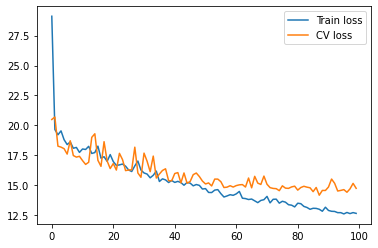

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mean_absolute_percentage_error'],label='Train loss')
plt.plot(history.history['val_mean_absolute_percentage_error'],label='CV loss')
plt.legend()
plt.show()

In [ ]:
y_pred_train=model.predict(X_train)
y_pred_cv=model.predict(X_cv)

In [ ]:
#Results of Tuned model on Train,cv data using MAD metric
from sklearn.metrics import median_absolute_error

print("\033[1m"+"Result after predicting with ANN:"+'\033[0m')
print(" ")
print("1. MAD for Train data with is "+str(median_absolute_error(y_train,y_pred_train)))
print("2. MAD for cv data is "+str(median_absolute_error(y_cv,y_pred_cv)))
print(" ")
print("\033[1m"+"Points to remember:"+'\033[0m')
print(" ")
print("1. This model is good compared to Random Forest as we are overfitting to train data and here both Train MAD and Test MAD are balanced")
print(" ")

Result after predicting with ANN:
 
1. MAD for Train data with is 645.3731689453125
2. MAD for cv data is 845.571533203125
 
Points to remember:
 
1. This model is good compared to Random Forest as we are overfitting to train data and here both Train MAD and Test MAD are balanced
 


In [1]:
#@title
{
    "tags": [
        "hide_input",
    ]
}
from prettytable import PrettyTable

# The Score is Median Absolute Deviation (MAD)
print("\033[1m"+"The Score we are using is Median Absolute Deviation:"+'\033[0m')
print(" ")
myTable = PrettyTable(["Model", "Train - Before Tuning","CV - Before Tuning","Train - After Tuning","CV - After Tuning"])
  
# Add rows

myTable.add_row(["Simple Mean Model", "3428", "3382", "-", "-"])
myTable.add_row(["KNN", "827", "1018", "863", "980"])
myTable.add_row(["Linear Regression", "8737", "8894", "-", "-"])
myTable.add_row(["SVM", "3100", "3145", "942", "928"])
myTable.add_row(["Decision Tree", "0", "525", "719", "900"])
myTable.add_row(["RandomForest", "247", "623", "247", "616"])
myTable.add_row(["ANN", "645", "845", "-", "-"])   
print(myTable)

The Score we are using is Median Absolute Deviation:
 
+-------------------+-----------------------+--------------------+----------------------+-------------------+
|       Model       | Train - Before Tuning | CV - Before Tuning | Train - After Tuning | CV - After Tuning |
+-------------------+-----------------------+--------------------+----------------------+-------------------+
| Simple Mean Model |          3428         |        3382        |          -           |         -         |
|        KNN        |          827          |        1018        |         863          |        980        |
| Linear Regression |          8737         |        8894        |          -           |         -         |
|        SVM        |          3100         |        3145        |         942          |        928        |
|   Decision Tree   |           0           |        525         |         719          |        900        |
|    RandomForest   |          247          |        623         